### Notes:

- Mean (naive model), OLS model
- Standardize variables for LASSO and Ridge Regression
- Lasso, Ridge Regression, Gradient Boosting Machines
- Discuss Tuning Process for each (Cross-validation)
- Discuss methodology of gradient boosting machines
- RMSE as performance metric

### Time Estimates

- Problem presentation/data description ~ 3 mins
- EDA ~ 2 mins
- Processing ~ 1 min
- Mean Model ~ 1 min
- Cross Validation ~ 2 min
- OLS Model ~ 1 min
- Lasso tuning and modeling ~ 3 mins
- Ridge tuning and modeling ~ 3 mins
- Gradient boosting introduction ~ 5 mins
- Gradient boosting tuning and modeling ~ 3 mins
- RMSE results and comparison ~ 1 min
- Variable Importances ~ 1 mins
- Conclusion ~ 1 min

### Resources

http://www3.dsi.uminho.pt/pcortez/student.pdf

# Supervised Machine Learning on Secondary School Performance

### STAT 527 - Jingbo Liu - Fall 2021

### Author: Gabe Taylor

### Agenda

- Problem presentation/data description ~ 3 mins
- Exploratory Data Analysis (EDA) ~ 2 mins
- Data Processing ~ 1 min
- **Lasso** tuning and modeling ~ 3 mins
- **Ridge** tuning and modeling ~ 3 mins
- **Gradient** boosting introduction ~ 5 mins
- **Gradient** boosting tuning and modeling ~ 3 mins
- Performance comparison ~ 1 min
- Variable Importances ~ 1 mins
- Conclusion ~ 1 min

# Data Description

![ ](imgs/attributes.png)

In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams.update(plt.rcParamsDefault)
plt.style.use("fivethirtyeight")

In [3]:
df = pd.read_csv("/Users/gabrieltaylor/Downloads/student/student-mat.csv", sep = ";")

In [4]:
df.head()

school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]

# EDA

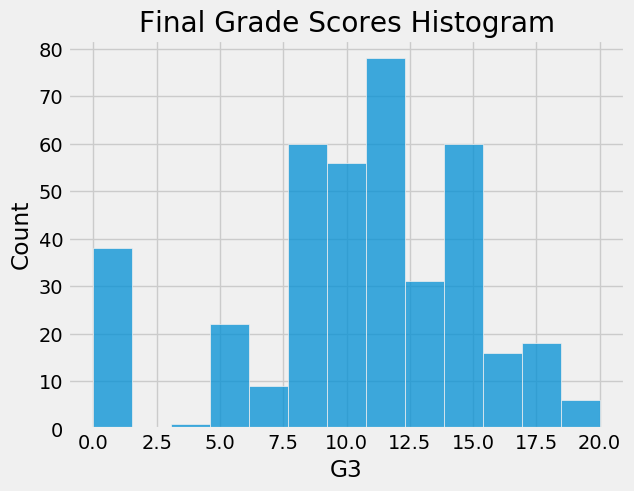

In [142]:
sns.histplot(data = df, x = 'G3')
plt.title('Final Grade Scores Histogram')
plt.show()

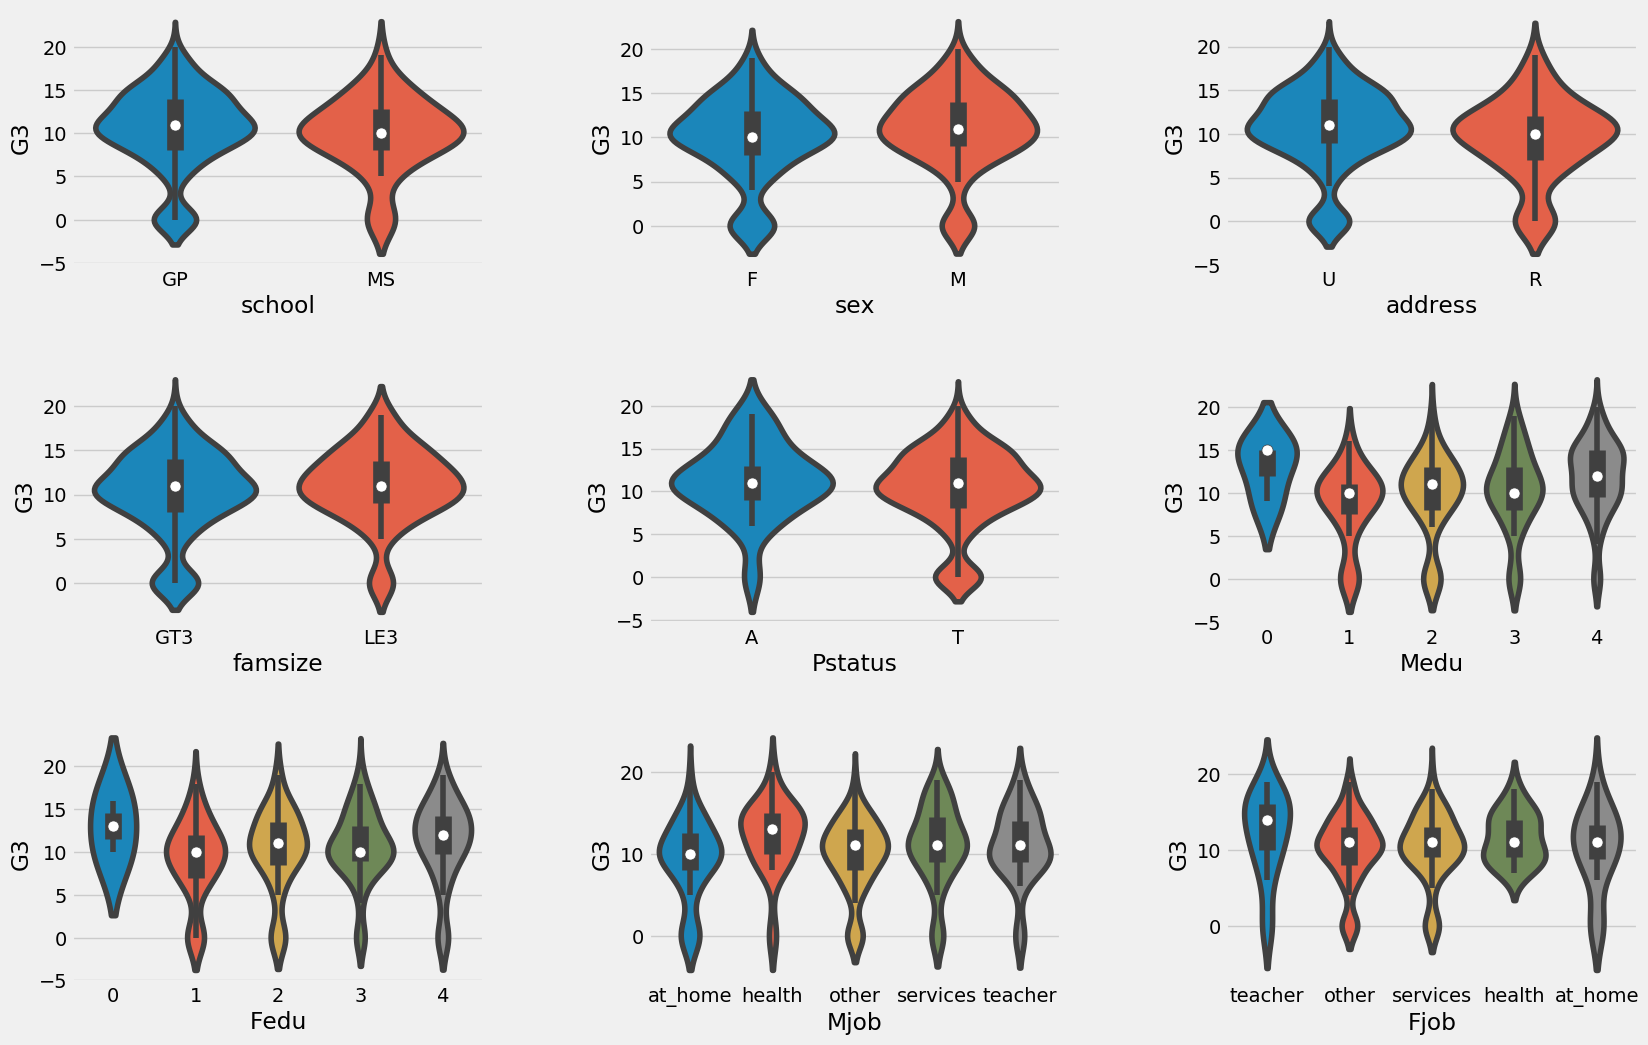

In [138]:
columns = ['school', 'sex', 'address', 'famsize', 
           'Pstatus', 'Medu', 'Fedu', 'Mjob', 
           'Fjob']
           
    
fig, axes = plt.subplots(3, 3, figsize = (18, 12))

fig.subplots_adjust(hspace=0.4, wspace=0.4)

# Iterating through axes and names
for col, ax in zip(columns, axes.flatten()):
    sns.violinplot(data = df, x = col, y = 'G3', ax = ax)

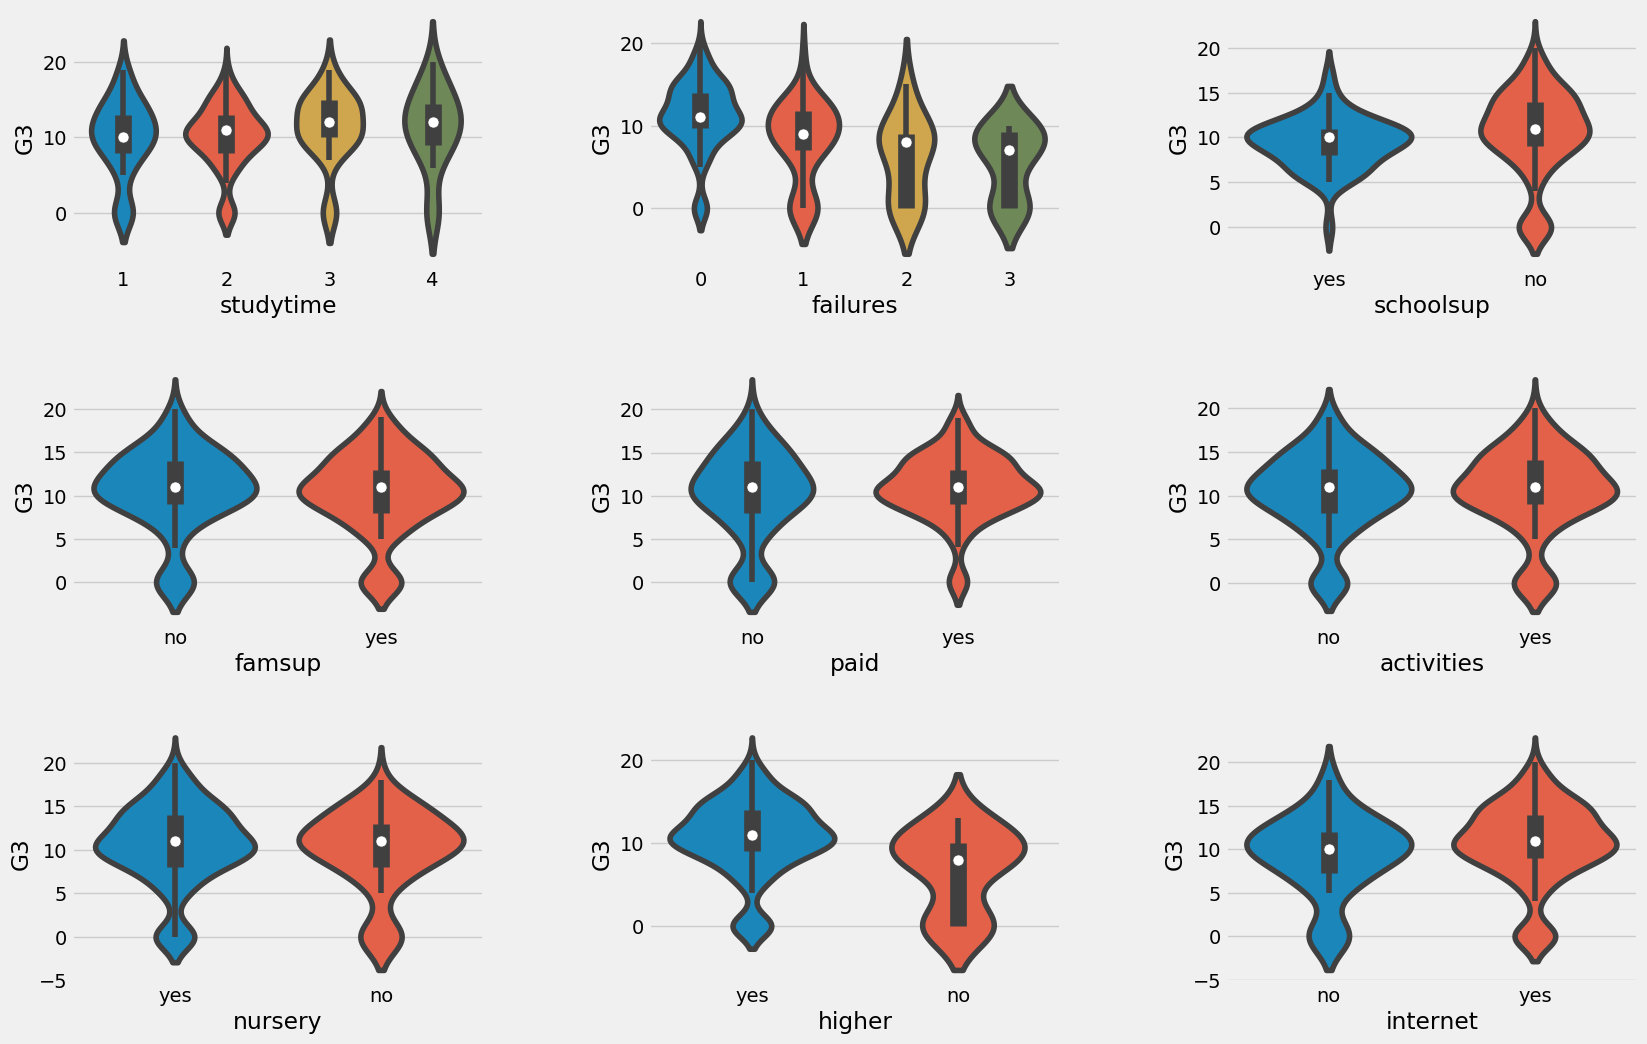

In [139]:
columns = ['studytime', 'failures', 'schoolsup', 'famsup', 
           'paid', 'activities', 'nursery', 'higher', 
           'internet']

fig, axes = plt.subplots(3, 3, figsize = (18, 12))

fig.subplots_adjust(hspace=0.4, wspace=0.4)

# Iterating through axes and names
for col, ax in zip(columns, axes.flatten()):
    sns.violinplot(data = df, x = col, y = 'G3', ax = ax)

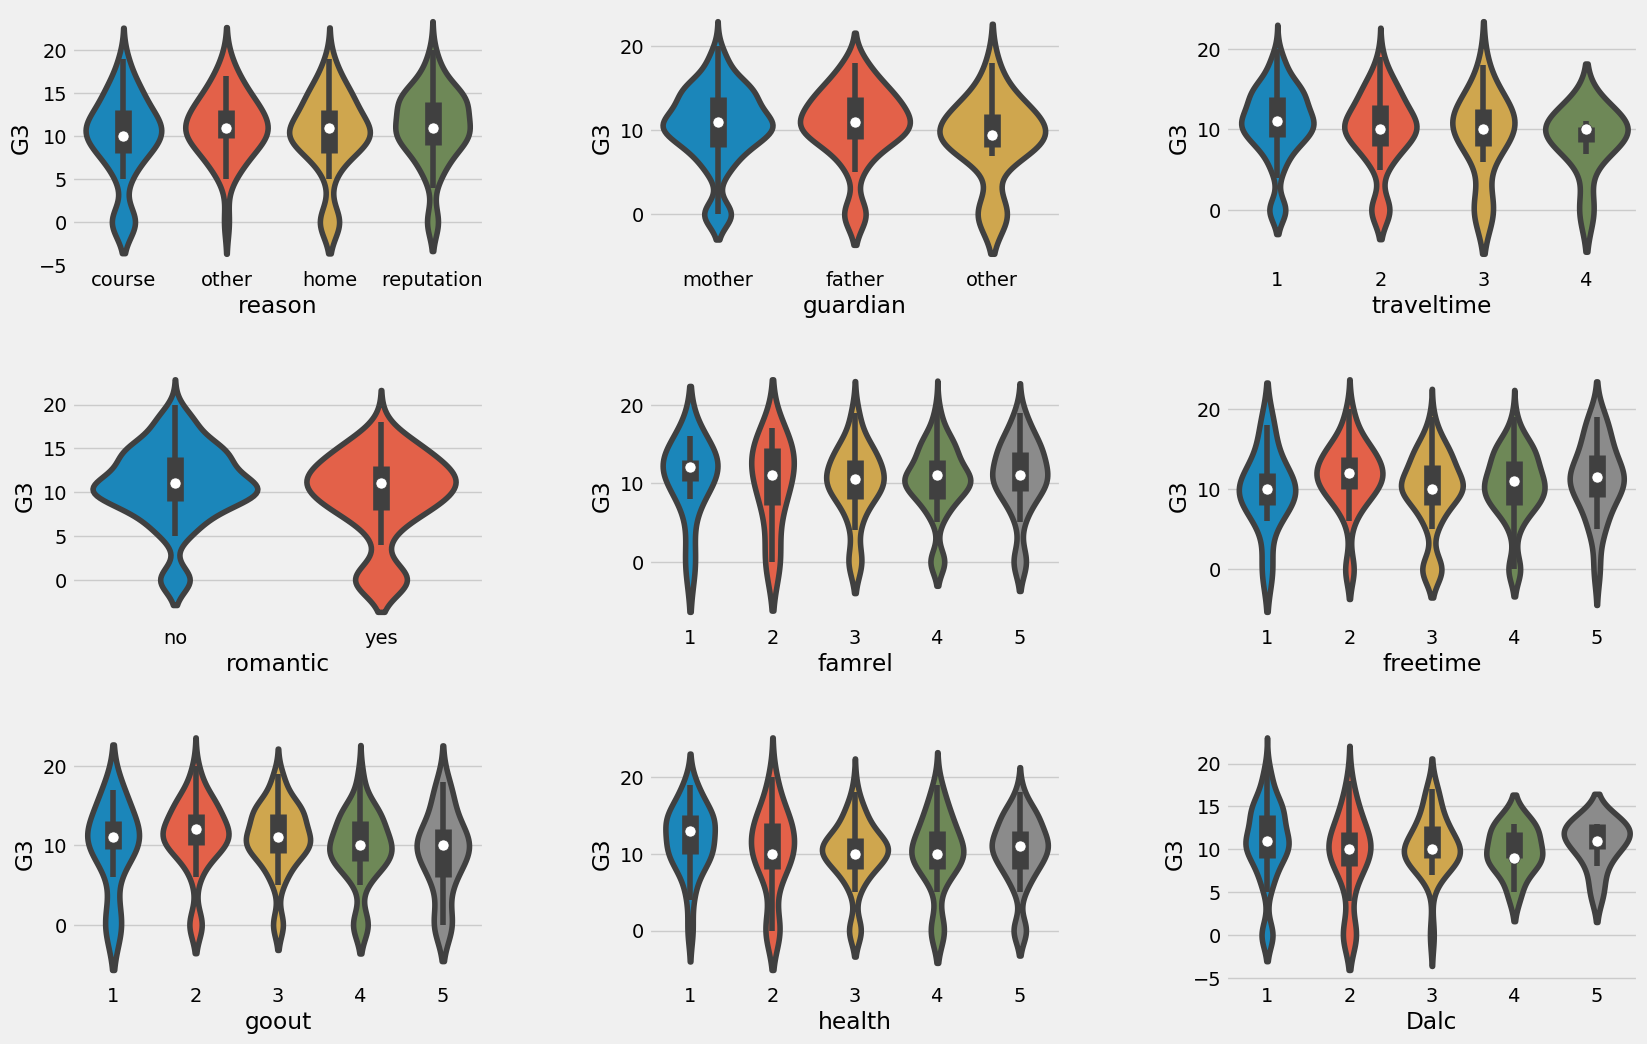

In [140]:
columns = ['reason', 'guardian', 'traveltime',
           'romantic', 'famrel', 'freetime', 
           'goout', 'health', 'Dalc']

fig, axes = plt.subplots(3, 3, figsize = (18, 12))

fig.subplots_adjust(hspace=0.4, wspace=0.4)

# Iterating through axes and names
for col, ax in zip(columns, axes.flatten()):
    sns.violinplot(data = df, x = col, y = 'G3', ax = ax)

# Data PreProcessing

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [42]:
nlevels = dict(df.nunique())
cats = [col for col in nlevels if nlevels[col] <= 5]
cat_df = pd.get_dummies(df[cats].astype(str), drop_first = True)

In [43]:
cat_df

school_MS  sex_M  address_U  famsize_LE3  Pstatus_T  Medu_1  Medu_2  \
0            0      0          1            0          0       0       0   
1            0      0          1            0          1       1       0   
2            0      0          1            1          1       1       0   
3            0      0          1            0          1       0       0   
4            0      0          1            0          1       0       0   
..         ...    ...        ...          ...        ...     ...     ...   
390          1      1          1            1          0       0       1   
391          1      1          1            1          1       0       0   
392          1      1          0            0          1       1       0   
393          1      1          0            1          1       0       0   
394          1      1          1            1          1       1       0   

     Medu_3  Medu_4  Fedu_1  ...  Dalc_4  Dalc_5  Walc_2  Walc_3  Walc_4  \
0         0       1       0  ...       0       0       0       0       0   
1         0       0       1  ...       0       0       0       0       0   
2         0       0       1  ...       0       0       0       1       0   
3         0       1       0  ...       0       0       0       0       0   
4         1       0       0  ...       0       0       1       0       0   
..      ...     ...     ...  ...     ...     ...     ...     ...     ...   
390       0       0       0  ...       1       0       0       0       0   
391       1       0       1  ...       0       0       0       0       1   
392       0       0       1  ...       0       0       0       1       0   
393       1       0       0  ...       0       0       0       0       1   
394       0       0       1  ...       0       0       0       1       0   

     Walc_5  health_2  health_3  health_4  health_5  
0         0         0         1         0         0  
1         0         0         1         0         0  
2         0         0         1         0         0  
3         0         0         0         0         1  
4         0         0         0         0         1  
..      ...       ...       ...       ...       ...  
390       1         0         0         1         0  
391       0         1         0         0         0  
392       0         0         1         0         0  
393       0         0         0         0         1  
394       0         0         0         0         1  

[395 rows x 67 columns]

In [44]:
cont_df = df[['age', 'absences', 'G3']]
new_df = pd.concat([cat_df, cont_df], axis = 1)

In [52]:
new_df

school_MS  sex_M  address_U  famsize_LE3  Pstatus_T  Medu_1  Medu_2  \
0            0      0          1            0          0       0       0   
1            0      0          1            0          1       1       0   
2            0      0          1            1          1       1       0   
3            0      0          1            0          1       0       0   
4            0      0          1            0          1       0       0   
..         ...    ...        ...          ...        ...     ...     ...   
390          1      1          1            1          0       0       1   
391          1      1          1            1          1       0       0   
392          1      1          0            0          1       1       0   
393          1      1          0            1          1       0       0   
394          1      1          1            1          1       1       0   

     Medu_3  Medu_4  Fedu_1  ...  Walc_3  Walc_4  Walc_5  health_2  health_3  \
0         0       1       0  ...       0       0       0         0         1   
1         0       0       1  ...       0       0       0         0         1   
2         0       0       1  ...       1       0       0         0         1   
3         0       1       0  ...       0       0       0         0         0   
4         1       0       0  ...       0       0       0         0         0   
..      ...     ...     ...  ...     ...     ...     ...       ...       ...   
390       0       0       0  ...       0       0       1         0         0   
391       1       0       1  ...       0       1       0         1         0   
392       0       0       1  ...       1       0       0         0         1   
393       1       0       0  ...       0       1       0         0         0   
394       0       0       1  ...       1       0       0         0         0   

     health_4  health_5  age  absences  G3  
0           0         0   18         6   6  
1           0         0   17         4   6  
2           0         0   15        10  10  
3           0         1   15         2  15  
4           0         1   16         4  10  
..        ...       ...  ...       ...  ..  
390         1         0   20        11   9  
391         0         0   17         3  16  
392         0         0   21         3   7  
393         0         1   18         0  10  
394         0         1   19         5   9  

[395 rows x 70 columns]

# Mean Model

In [270]:
def rmse(true, pred):
    return np.sqrt(np.mean((true - pred) ** 2))

$$RMSE = \sqrt{\frac{1}{n} \sum_{i = 1}^n (y_i - \hat y_i)^2}$$

In [272]:
print("Mean Model RMSE: " + str(round(rmse(df['G3'], np.mean(df['G3'])), 3)))

Mean Model RMSE: 4.576


# Cross-Validation

### 10 Fold Cross Validation

1. Split data into 10 folds
2. Reserve 1 fold for validation (scoring)
3. Train model on remaining 9 folds

![](imgs/CV1.png)

### How to evaluate performance

One could take the average error over all of the folds:

![](imgs/CV2.png)


Alternatively, one could append the cross-validation predictions to the original training data, and score the predictions using the the full training observations

![](imgs/CV3.png)

### What about the Test Data?

In practice, it is useful to score the final model on a holdout set in order to evaluate how well the the model will generalize to unseen data. In the project, due to the small training size, we will not reserve a portion of the data for a hold out, but instead, we will construct a 'test set' using the 10 folds as illustrated in the second method in previous slide.

- This is how the original paper scored their models

- This is how H2o obtains cross-validation metrics

# OLS Model

In [41]:
import h2o
h2o.init()
from h2o.estimators.glm import H2OGeneralizedLinearEstimator

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


--------------------------  ------------------------------------------------------------------
H2O_cluster_uptime:         9 days 20 hours 6 mins
H2O_cluster_timezone:       America/Chicago
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.34.0.3
H2O_cluster_version_age:    1 month and 14 days
H2O_cluster_name:           H2O_from_python_gabrieltaylor_fifq0g
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    1.582 Gb
H2O_cluster_total_cores:    8
H2O_cluster_allowed_cores:  8
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://localhost:54321
H2O_connection_proxy:       {"http": null, "https": null}
H2O_internal_security:      False
H2O_API_Extensions:         Amazon S3, XGBoost, Algos, AutoML, Core V3, TargetEncoder, Core V4
Python_version:             3.7.6 final
--------------------------  ------------------------------------------------------------------

In [32]:
# train = new_df.sample(frac = 0.8)
# val = new_df.iloc[-train.index, :]

In [47]:
# train = h2o.H2OFrame(train)
# val = h2o.H2OFrame(val)
full = h2o.H2OFrame(new_df)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [49]:
predictors = full.columns
predictors.remove('G3')
target = 'G3'

In [154]:
glm_model = H2OGeneralizedLinearEstimator(family= "gaussian",
                                          nfolds = 10,
                                          lambda_ = 0,
                                          compute_p_values = True)
glm_model.train(predictors, target, training_frame= full)

glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
Model Details
H2OGeneralizedLinearEstimator :  Generalized Linear Modeling
Model Key:  GLM_model_python_1636749588785_30


GLM Model: summary


family      link regularization  number_of_predictors_total  \
0    gaussian  identity           None                          69   

  number_of_active_predictors  number_of_iterations  \
0                          69                     1   

                                          training_frame  
0  Key_Frame__upload_b7d60efe290bd4b2bf2ec9f7b1c4121.hex



ModelMetricsRegressionGLM: glm
** Reported on train data. **

MSE: 13.486932509706511
RMSE: 3.672455923453202
MAE: 2.8324191358026636
RMSLE: 0.6845751042785602
R^2: 0.35581655964648506
Mean Residual Deviance: 13.486932509706511
Null degrees of freedom: 394
Residual degrees of freedom: 325
Null deviance: 8269.908860759497
Residual deviance: 5327.338341334072
AIC: 2290.6413367285545

ModelMetricsRegressionGLM: glm
** Reported on cross-validation data. **

MSE: 21.31709029108995
RMSE: 4.61704345778659
MAE: 3.5396768727617958
RMSLE: 0.7883417496512447
R^2: -0.018179378606504315
Mean Residual Deviance: 21.31709029108995
Null degrees of freedom: 394
Residual degrees of freedom: 325
Null deviance: 8324.139307668625
Residual deviance: 8420.250664980531
AIC: 2471.4675405032276

Cross-Validation Metrics Summary: 


mean          sd  cv_1_valid  cv_2_valid  \
0                     mae    3.555521    0.289252    3.435685    3.066880   
1  mean_residual_deviance   21.457191    3.190338   20.636683   17.633959   
2                     mse   21.457191    3.190338   20.636683   17.633959   
3           null_deviance  832.413940  172.723940  925.497000  590.021550   
4                      r2   -0.090922    0.284181    0.085510   -0.391826   
5       residual_deviance  842.025100  113.989334  846.104000  811.162100   
6                    rmse    4.620581    0.345486    4.542762    4.199281   
7                   rmsle    0.786432    0.120115    0.750474    0.692553   

   cv_3_valid   cv_4_valid   cv_5_valid  cv_6_valid  cv_7_valid  cv_8_valid  \
0    3.730947     3.636249     3.720497    3.635510    3.801912    3.248460   
1   24.163652    23.432957    19.312742   22.947094   24.014060   18.790773   
2   24.163652    23.432957    19.312742   22.947094   24.014060   18.790773   
3  641.493600   993.097000  1104.521500  870.926200  603.358030  806.045170   
4   -0.558796    -0.066537     0.310617    0.051434   -0.401888    0.159899   
5  990.709800  1031.050200   733.884200  826.095340  840.492070  676.467830   
6    4.915654     4.840760     4.394627    4.790312    4.900414    4.334833   
7    0.761288     0.839763     0.760239    0.848904    0.752350    0.791084   

   cv_9_valid  cv_10_valid  
0    3.279087     3.999989  
1   17.110634    26.529370  
2   17.110634    26.529370  
3  929.191900   859.987500  
4    0.094362    -0.191992  
5  735.757260   928.527900  
6    4.136500     5.150667  
7    0.603616     1.064051


Scoring History: 


timestamp    duration  iterations negative_log_likelihood  \
0    2021-11-22 14:10:19   0.000 sec           0                 8269.91   
1    2021-11-22 14:10:19   0.006 sec           1                           

  objective training_rmse training_deviance training_mae training_r2  
0   20.9365                                                           
1                 3.67246           13.4869      2.83242    0.355817


Variable Importances: 


variable  relative_importance  scaled_importance  percentage
0         Medu_2             1.835298           1.000000    0.061281
1         Medu_1             1.669643           0.909740    0.055750
2         Medu_3             1.636650           0.891763    0.054648
3         Medu_4             1.230500           0.670463    0.041087
4         Fedu_2             0.992622           0.540851    0.033144
5         Fedu_3             0.905426           0.493340    0.030232
6     failures_3             0.893726           0.486965    0.029842
7         Fedu_4             0.881375           0.480236    0.029429
8     failures_1             0.857225           0.467077    0.028623
9     freetime_5             0.828484           0.451417    0.027663
10    failures_2             0.787204           0.428924    0.026285
11   studytime_3             0.681765           0.371473    0.022764
12       goout_2             0.668160           0.364060    0.022310
13        Fedu_1             0.667243           0.363561    0.022279
14  Mjob_teacher             0.649335           0.353803    0.021681
15        Walc_5             0.633913           0.345400    0.021166
16  romantic_yes             0.623946           0.339970    0.020834
17      health_5             0.607102           0.330792    0.020271
18         sex_M             0.595258           0.324338    0.019876
19    freetime_2             0.588476           0.320644    0.019649


See the whole table with table.as_data_frame()


### Summary

In [158]:
print("Training RMSE: " + str(round(glm_model.rmse(train = True), 3)))
print("Cross Validation RMSE: " + str(round(glm_model.rmse(xval = True), 3)))

Training RMSE: 3.672
Cross Validation RMSE: 4.617


In [143]:
glm_model._model_json['output']['coefficients_table'].as_data_frame()[['names', 'standardized_coefficients']]

names  standardized_coefficients
0     Intercept                  10.415190
1     school_MS                   0.000000
2         sex_M                   0.193052
3     address_U                   0.034271
4   famsize_LE3                   0.072247
..          ...                        ...
65     health_3                   0.000000
66     health_4                   0.000000
67     health_5                   0.000000
68          age                  -0.064371
69     absences                   0.007380

[70 rows x 2 columns]

# LASSO Model

In [159]:
glm_model = H2OGeneralizedLinearEstimator(family= "gaussian",
                                          lambda_search = True,
                                          alpha = 1,
                                          nfolds = 10,
                                          seed = 69)
glm_model.train(predictors, target, training_frame= full)

glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
Model Details
H2OGeneralizedLinearEstimator :  Generalized Linear Modeling
Model Key:  GLM_model_python_1636749588785_31


GLM Model: summary


family      link            regularization  \
0    gaussian  identity  Lasso (lambda = 0.2965 )   

                                                           lambda_search  \
0  nlambda = 100, lambda.max = 0.9485, lambda.min = 0.2965, lambda.1s...   

   number_of_predictors_total number_of_active_predictors  \
0                          69                          25   

   number_of_iterations                                         training_frame  
0                    26  Key_Frame__upload_b7d60efe290bd4b2bf2ec9f7b1c4121.hex



ModelMetricsRegressionGLM: glm
** Reported on train data. **

MSE: 16.692176462204667
RMSE: 4.085606009174731
MAE: 3.0638028916474225
RMSLE: 0.7535808183599787
R^2: 0.20272280945484178
Mean Residual Deviance: 16.692176462204667
Null degrees of freedom: 394
Residual degrees of freedom: 369
Null deviance: 8269.908860759497
Residual deviance: 6593.409702570843
AIC: 2286.8627942947187

ModelMetricsRegressionGLM: glm
** Reported on cross-validation data. **

MSE: 19.022776165265565
RMSE: 4.361510766381938
MAE: 3.2773486993879195
RMSLE: 0.7788629037282087
R^2: 0.09140515188340048
Mean Residual Deviance: 19.022776165265565
Null degrees of freedom: 394
Residual degrees of freedom: 375
Null deviance: 8288.036459343948
Residual deviance: 7513.996585279898
AIC: 2326.488058911758

Cross-Validation Metrics Summary: 


mean          sd  cv_1_valid  cv_2_valid  \
0                     mae    3.273087    0.581883    3.554074    2.631927   
1  mean_residual_deviance   18.236427    6.004068   20.034657   11.685548   
2                     mse   18.236427    6.004068   20.034657   11.685548   
3           null_deviance  828.803650  223.412460  957.898600  771.433300   
4                      r2    0.138267    0.106264    0.090452    0.196930   
5       residual_deviance  714.019960  253.638340  861.490230  619.334050   
6                    rmse    4.214856    0.723736    4.476009    3.418413   
7                   rmsle    0.753824    0.162502    0.771572    0.579793   

   cv_3_valid  cv_4_valid   cv_5_valid  cv_6_valid  cv_7_valid  cv_8_valid  \
0    3.371198    3.945518     3.683917    2.870856    3.127855    2.218140   
1   17.789808   23.295992    22.926697   15.159411   15.264750    8.401168   
2   17.789808   23.295992    22.926697   15.159411   15.264750    8.401168   
3  897.355500  889.953200  1025.828600  527.424440  608.781860  500.123800   
4    0.296880    0.107800    -0.014478    0.029555    0.220872    0.231154   
5  622.643250  792.063700  1031.701400  485.101170  473.207240  361.250240   
6    4.217796    4.826592     4.788183    3.893509    3.907013    2.898477   
7    0.847503    0.785289     0.857846    0.752453    0.730772    0.398213   

   cv_9_valid  cv_10_valid  
0    3.260117     4.067265  
1   18.841473    28.964767  
2   18.841473    28.964767  
3  926.654400  1182.582600  
4    0.206109     0.017394  
5  734.817440  1158.590700  
6    4.340677     5.381893  
7    0.828945     0.985856


Scoring History: 


timestamp    duration  iteration lambda  predictors  \
0     2021-11-22 14:13:35   0.000 sec          1  .95E0           1   
1     2021-11-22 14:13:35   0.001 sec          2  .91E0           3   
2     2021-11-22 14:13:35   0.001 sec          3  .86E0           5   
3     2021-11-22 14:13:35   0.002 sec          4  .82E0           5   
4     2021-11-22 14:13:35   0.002 sec          5  .79E0           5   
5     2021-11-22 14:13:35   0.003 sec          6  .75E0           5   
6     2021-11-22 14:13:35   0.003 sec          7  .72E0           5   
7     2021-11-22 14:13:35   0.004 sec          8  .68E0           6   
8     2021-11-22 14:13:35   0.004 sec          9  .65E0           6   
9     2021-11-22 14:13:35   0.004 sec         10  .62E0           6   
10    2021-11-22 14:13:35   0.005 sec         11   .6E0           6   
11    2021-11-22 14:13:35   0.005 sec         12  .57E0           6   
12    2021-11-22 14:13:35   0.006 sec         13  .54E0           7   
13    2021-11-22 14:13:35   0.006 sec         14  .52E0           8   
14    2021-11-22 14:13:35   0.007 sec         15  .49E0          10   
15    2021-11-22 14:13:35   0.007 sec         16  .47E0          11   
16    2021-11-22 14:13:35   0.010 sec         17  .45E0          13   
17    2021-11-22 14:13:35   0.014 sec         18  .43E0          13   
18    2021-11-22 14:13:35   0.014 sec         19  .41E0          14   
19    2021-11-22 14:13:35   0.015 sec         20  .39E0          15   

    deviance_train  deviance_xval  deviance_se  alpha  iterations  \
0        20.936478      21.265692     1.780919    1.0         NaN   
1        20.760005      21.248242     1.788466    1.0         NaN   
2        20.584222      21.255312     1.785461    1.0         NaN   
3        20.330440      21.242915     1.775094    1.0         NaN   
4        20.099173      21.172989     1.773689    1.0         NaN   
5        19.888451      21.034314     1.769087    1.0         NaN   
6        19.696450      20.910351     1.771771    1.0         NaN   
7        19.512544      20.793966     1.775418    1.0         NaN   
8        19.343079      20.657493     1.773811    1.0         NaN   
9        19.188666      20.514029     1.781145    1.0         NaN   
10       19.047970      20.332674     1.790249    1.0         NaN   
11       18.919774      20.192168     1.806648    1.0         NaN   
12       18.799361      20.077211     1.820156    1.0         NaN   
13       18.656315      19.983983     1.832395    1.0         NaN   
14       18.509771      19.906579     1.844846    1.0         NaN   
15       18.365158      19.811944     1.852508    1.0         NaN   
16       18.200860      19.753798     1.865342    1.0         NaN   
17       18.030812      19.737459     1.896161    1.0         NaN   
18       17.870146      19.686354     1.905671    1.0         NaN   
19       17.714290      19.622857     1.913140    1.0         NaN   

   training_rmse training_deviance training_mae training_r2  
0                                                            
1                                                            
2                                                            
3                                                            
4                                                            
5                                                            
6                                                            
7                                                            
8                                                            
9                                                            
10                                                           
11                                                           
12                                                           
13                                                           
14                                                           
15                                                           
16                  


See the whole table with table.as_data_frame()

Variable Importances: 


variable  relative_importance  scaled_importance  percentage
0      failures_2             0.621929           1.000000    0.149538
1      failures_1             0.608071           0.977717    0.146206
2      failures_3             0.604934           0.972673    0.145452
3          Medu_4             0.336882           0.541673    0.081001
4      freetime_3             0.241182           0.387797    0.057990
5   Mjob_services             0.204124           0.328210    0.049080
6           sex_M             0.193052           0.310408    0.046418
7    romantic_yes             0.170427           0.274029    0.040978
8      higher_yes             0.168823           0.271451    0.040592
9         goout_5             0.121048           0.194634    0.029105
10    studytime_3             0.118721           0.190892    0.028546
11        goout_2             0.107856           0.173422    0.025933
12         Dalc_2             0.077596           0.124767    0.018657
13    Mjob_health             0.074712           0.120129    0.017964
14    famsize_LE3             0.072247           0.116166    0.017371
15        goout_4             0.067517           0.108560    0.016234
16            age             0.064371           0.103501    0.015477
17  schoolsup_yes             0.063288           0.101760    0.015217
18         Medu_1             0.061367           0.098673    0.014755
19     freetime_5             0.054082           0.086958    0.013004


See the whole table with table.as_data_frame()


### Summary

In [160]:
print("Training RMSE: " + str(round(glm_model.rmse(train = True), 3)))
print("Cross Validation RMSE: " + str(round(glm_model.rmse(xval = True), 3)))

Training RMSE: 4.086
Cross Validation RMSE: 4.362


### Coefficients

In [161]:
glm_model._model_json['output']['coefficients_table'].as_data_frame()[['names', 'standardized_coefficients']]

names  standardized_coefficients
0     Intercept                  10.415190
1     school_MS                   0.000000
2         sex_M                   0.193052
3     address_U                   0.034271
4   famsize_LE3                   0.072247
..          ...                        ...
65     health_3                   0.000000
66     health_4                   0.000000
67     health_5                   0.000000
68          age                  -0.064371
69     absences                   0.007380

[70 rows x 2 columns]

In [267]:
l1_coef  =  glm_model._model_json['output']['coefficients_table']\
                     .as_data_frame()\
                     .query("standardized_coefficients != 0")\
                     .sort_values('standardized_coefficients', ascending = False)\
                     .reset_index(drop = True)
l1_coef[['names', 'standardized_coefficients']]

names  standardized_coefficients
0           Intercept                  10.415190
1              Medu_4                   0.336882
2       Mjob_services                   0.204124
3               sex_M                   0.193052
4          higher_yes                   0.168823
5         studytime_3                   0.118721
6             goout_2                   0.107856
7         Mjob_health                   0.074712
8         famsize_LE3                   0.072247
9          freetime_5                   0.054082
10  reason_reputation                   0.052682
11          address_U                   0.034271
12         freetime_2                   0.030301
13           absences                   0.007380
14       internet_yes                   0.002141
15             Medu_1                  -0.061367
16      schoolsup_yes                  -0.063288
17                age                  -0.064371
18            goout_4                  -0.067517
19             Dalc_2                  -0.077596
20            goout_5                  -0.121048
21       romantic_yes                  -0.170427
22         freetime_3                  -0.241182
23         failures_3                  -0.604934
24         failures_1                  -0.608071
25         failures_2                  -0.621929

In [228]:
sign = lambda x: 'Positive' if x > 0 else 'Negative'
l1_coef['sign'] = l1_coef['coefficients'].apply(sign)
l1_coef['abs'] = l1_coef['standardized_coefficients'].apply(abs)
# l1_coef = l1_coef.sort_values('abs').iloc[ :-1, :]
l1_coef = l1_coef.sort_values('standardized_coefficients').iloc[ :-1, :].reset_index(drop = True)

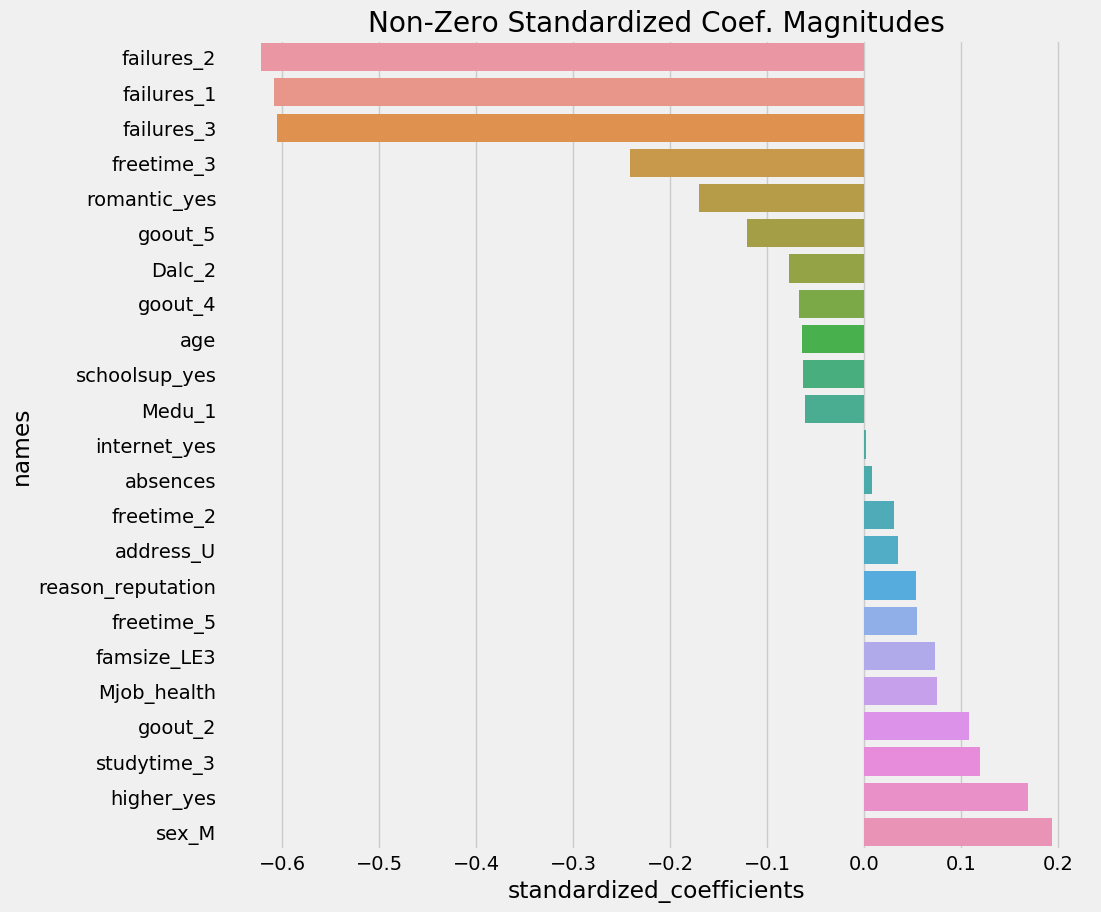

In [259]:
plt.figure(figsize = (10, 10))
g = sns.barplot(x = 'standardized_coefficients', y = 'names', data = l1_coef)
plt.title('Non-Zero Standardized Coef. Magnitudes')
plt.show()

# Lambda Search

In [221]:
coef_path = glm_model.getGLMRegularizationPath(glm_model)['coefficients']
coef_path_df = pd.concat([pd.DataFrame(coef_path[i], index = [1]) for i in range(len(coef_path))])
coef_path_df['lambdas'] = glm_model.getGLMRegularizationPath(glm_model)['lambdas']

In [234]:
top10 = list(l1_coef.sort_values('abs', ascending = False).reset_index(drop = True).loc[:10, 'names'])
coef_path_df = coef_path_df[top10 + ['lambdas']]

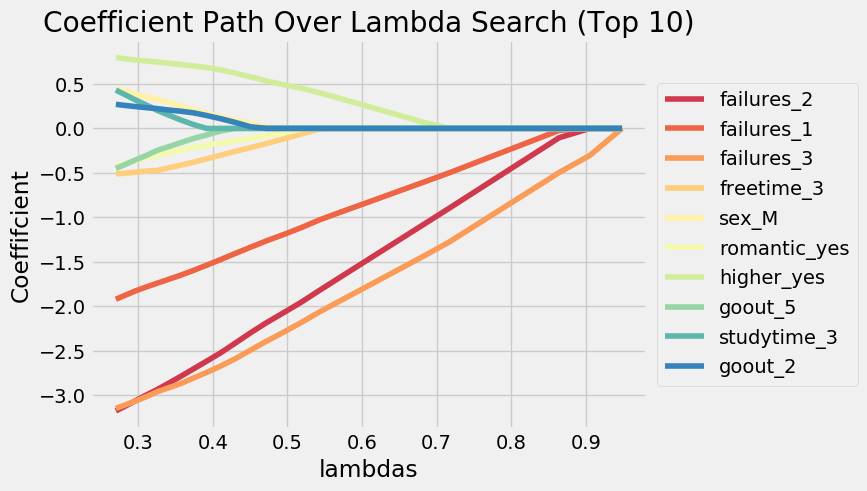

In [268]:
sns.set_palette('Spectral', n_colors = 10)
for col, color in zip(coef_path_df.columns[:-1], cmap):
    sns.lineplot(x = 'lambdas', y = col, data = coef_path_df, 
                 label = col)

plt.ylabel('Coeffifcient')
plt.legend(loc = "center left", bbox_to_anchor=(1, 0.5))
plt.title("Coefficient Path Over Lambda Search (Top 10)")
plt.show()

# Gradient Boosting Machines

### Decision Tree Primer

![](imgs/DT1.png)

[source](https://bradleyboehmke.github.io/HOML/DT.html)

![](imgs/DT2.png)

[source](https://bradleyboehmke.github.io/HOML/DT.html)

# How to fit Regression Tree?

$$f(x) = \sum_{m=1}^M c_m I(x \in r_m)$$

### Simple task if objective function is sum of squares

$$\hat c_m = \text{ave} (y_i | x_i \in R_m)$$


$$R_1(j, s) = {X|X_j \leq s} \quad \text{and} \quad R_2(j, s) = {X|X_j > s}$$

$$\min_{j, s} \left[ \min_{c_1} \sum_{x_i \in R_1(j, s)} (y_i - c_1)^2 +  \min_{c_2} \sum_{x_i \in R_1(j, s)} (y_i - c_2)^2 \right]$$

$$\hat c_1 = \text{ave}(y_i |x_i \in R_1(j, s)) \quad \text{and} \quad \hat c_2 = \text{ave}(y_i |x_i \in R_2(j, s))$$

# Boosting

### How to boost decision trees

Sequentially fitting additive decision trees to the residuals of the current model.

1. Fit initial decision tree original data $T_1(x)$
2. Fit new decision tree to residuals from first tree $h_1(x) = T_1(x) - y$
3. Add new tree to global model $T_2(x) = T_1(x) + h_1(x)$
4. Fit new decision tree to residuals from second tree $h_2(x) = T_2(x) - y$
5. Add new tree to global model $T_3(x) = T_2(x) + h_2(x)$
6. Continue for some fixed number of iterations for other stopping criterion

![](imgs/GBMalg.png)

In [43]:
train = h2o.H2OFrame(df)
# val = h2o.H2OFrame(val)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [46]:
predictors = train.columns.remove('G3')

In [39]:
from h2o.estimators import H2OGradientBoostingEstimator
from h2o.grid.grid_search import H2OGridSearch

In [26]:
# gbm_params = { 'learn_rate': [0.01 * i for i in range(1, 10)],
#                'max_depth': [i for i in range(8)],
#                'ntrees' : [25, 50, 100, 200],
#                'sample_rate': [0.8, 1.0],
#                'col_sample_rate': [0.2, 0.5, 1.0]}

# gbm_grid = H2OGridSearch(model = H2OGradientBoostingEstimator,
#                           grid_id = 'gbm_grid',
#                           hyper_params = gbm_params)


# gbm_grid.train(x = predictors, 
#                y = target,
#                training_frame = train,
#                validation_frame = val)

gbm Grid Build progress: |█ (cancelled)


H2OJobCancelled: Job<$03017f00000132d4ffffffff$_81dbccb8a4c95dc5737d44b5b78d4dbf> was cancelled by the user.

In [62]:
gbm_model = H2OGradientBoostingEstimator(nfolds = 5, 
                                         categorical_encoding = 'enum',
                                         keep_cross_validation_predictions = True)
gbm_model.train(x = predictors, y = target, training_frame=train)

gbm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Machine
Model Key:  GBM_model_python_1636749588785_18


Model Summary: 


number_of_trees  number_of_internal_trees  model_size_in_bytes  \
0               50.0                      50.0              14911.0   

   min_depth  max_depth  mean_depth  min_leaves  max_leaves  mean_leaves  
0        5.0        5.0         5.0        10.0        25.0        19.06



ModelMetricsRegression: gbm
** Reported on train data. **

MSE: 0.5455371493087976
RMSE: 0.7386048668325965
MAE: 0.48501767997594575
RMSLE: 0.23759981122599827
Mean Residual Deviance: 0.5455371493087976

ModelMetricsRegression: gbm
** Reported on cross-validation data. **

MSE: 2.6290264739640623
RMSE: 1.6214272953062256
MAE: 1.0287924459711113
RMSLE: NaN
Mean Residual Deviance: 2.6290264739640623

Cross-Validation Metrics Summary: 


mean        sd  cv_1_valid  cv_2_valid  \
0                     mae  1.026640  0.073279    0.980368    0.988976   
1  mean_residual_deviance  2.600349  0.521785    1.776238    3.058727   
2                     mse  2.600349  0.521785    1.776238    3.058727   
3                      r2  0.870000  0.044851    0.920941    0.800252   
4       residual_deviance  2.600349  0.521785    1.776238    3.058727   
5                    rmse  1.605446  0.169161    1.332756    1.748922   
6                   rmsle  0.378733  0.071892    0.321553    0.328708   

   cv_3_valid  cv_4_valid  cv_5_valid  
0    1.121257    0.954555    1.088045  
1    3.036629    2.506174    2.623979  
2    3.036629    2.506174    2.623979  
3    0.870097    0.865010    0.893699  
4    3.036629    2.506174    2.623979  
5    1.742593    1.583090    1.619870  
6    0.476983    0.387687         NaN


Scoring History: 


timestamp    duration  number_of_trees  training_rmse  \
0     2021-11-16 12:21:19   0.271 sec              0.0       4.575640   
1     2021-11-16 12:21:19   0.274 sec              1.0       4.167054   
2     2021-11-16 12:21:19   0.276 sec              2.0       3.796168   
3     2021-11-16 12:21:19   0.278 sec              3.0       3.466612   
4     2021-11-16 12:21:19   0.280 sec              4.0       3.174204   
5     2021-11-16 12:21:19   0.281 sec              5.0       2.913417   
6     2021-11-16 12:21:19   0.283 sec              6.0       2.681236   
7     2021-11-16 12:21:19   0.284 sec              7.0       2.473818   
8     2021-11-16 12:21:19   0.286 sec              8.0       2.292323   
9     2021-11-16 12:21:19   0.288 sec              9.0       2.126083   
10    2021-11-16 12:21:19   0.289 sec             10.0       1.983918   
11    2021-11-16 12:21:19   0.291 sec             11.0       1.861494   
12    2021-11-16 12:21:19   0.292 sec             12.0       1.753742   
13    2021-11-16 12:21:19   0.293 sec             13.0       1.649434   
14    2021-11-16 12:21:19   0.295 sec             14.0       1.565453   
15    2021-11-16 12:21:19   0.297 sec             15.0       1.497102   
16    2021-11-16 12:21:19   0.298 sec             16.0       1.427987   
17    2021-11-16 12:21:19   0.300 sec             17.0       1.369021   
18    2021-11-16 12:21:19   0.301 sec             18.0       1.319878   
19    2021-11-16 12:21:19   0.303 sec             19.0       1.272346   

    training_mae  training_deviance  
0       3.428989          20.936478  
1       3.105666          17.364336  
2       2.813024          14.410891  
3       2.558943          12.017397  
4       2.338405          10.075568  
5       2.146553           8.487997  
6       1.976713           7.189029  
7       1.827916           6.119776  
8       1.692708           5.254743  
9       1.571902           4.520227  
10      1.463144           3.935931  
11      1.368957           3.465161  
12      1.283198           3.075610  
13      1.202136           2.720634  
14      1.135448           2.450642  
15      1.075200           2.241314  
16      1.022821           2.039147  
17      0.972751           1.874220  
18      0.931341           1.742078  
19      0.889428           1.618865


See the whole table with table.as_data_frame()

Variable Importances: 


variable  relative_importance  scaled_importance  percentage
0           G2         32841.832031           1.000000    0.774723
1     absences          5931.299805           0.180602    0.139917
2          age           934.687805           0.028460    0.022049
3       reason           494.909943           0.015069    0.011675
4           G1           312.668243           0.009520    0.007376
5         Fjob           237.929459           0.007245    0.005613
6     guardian           224.171295           0.006826    0.005288
7       famrel           210.839600           0.006420    0.004974
8   activities           170.276077           0.005185    0.004017
9       health           169.944199           0.005175    0.004009
10       goout           139.535873           0.004249    0.003292
11        Mjob           136.203491           0.004147    0.003213
12   studytime           115.187965           0.003507    0.002717
13  traveltime           114.101830           0.003474    0.002692
14        Walc           103.469376           0.003151    0.002441
15    freetime            60.049408           0.001828    0.001417
16        Fedu            51.092613           0.001556    0.001205
17        Medu            36.198334           0.001102    0.000854
18    failures            35.389370           0.001078    0.000835
19    romantic            19.636011           0.000598    0.000463


See the whole table with table.as_data_frame()
